In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

# Task 1. Load CSV file of COVID-19 cases into a dataframe using pd.read_csv()
cases_df = pd.read_csv('enhanced_sur_covid_19_eng.csv') 
cases_df.head()
# cases_df.tail()

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Classification*,Case status*
0,1,23/01/2020,21/01/2020,M,39.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed
1,2,23/01/2020,18/01/2020,M,56.0,NaN,Discharged,HK resident,Imported case,Confirmed
2,3,24/01/2020,20/01/2020,F,62.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed
3,4,24/01/2020,23/01/2020,F,62.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed
4,5,24/01/2020,23/01/2020,M,63.0,NaN,Discharged,Non-HK resident,Imported case,Confirmed


In [2]:
# Task 2. Removing an empty column
cases_df = cases_df.drop(columns=['Name of hospital admitted'])

# To apply the changes to the existing dataframe without having to reload the data.
# I have to add inplace=True, or assign the change to the original dataframe
# cases_df

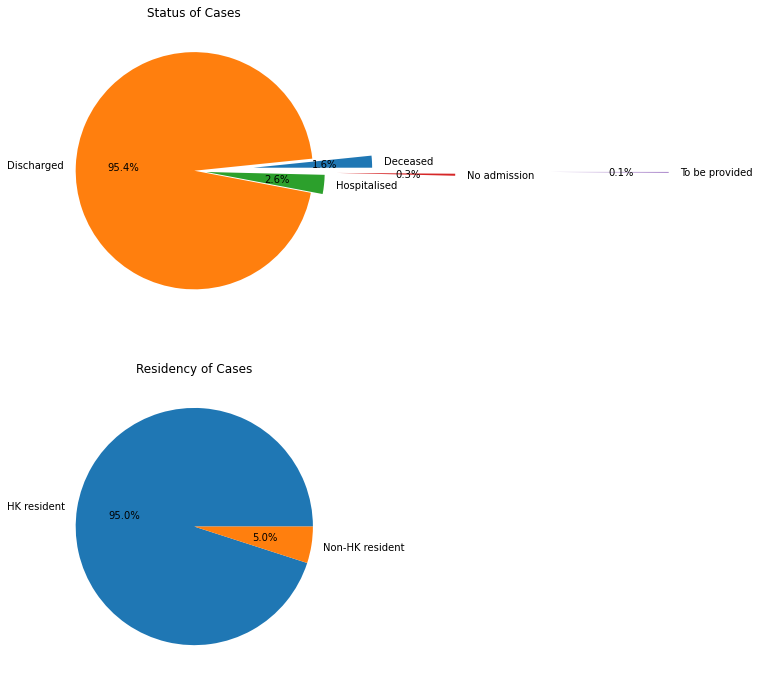

In [3]:
# Task 3.  Show pie charts of status of cases and the classification

st_stat = cases_df.groupby(['Hospitalised/Discharged/Deceased']).count()
st_stat = st_stat[:]['Case no.']
#print(st_stat)
#index from 0 to 4, index 0: Deceased, index 1: Discharged, index 2: Hospitalized, index 3: No admission, index 4: To be provided.

fig, ax = plt.subplots(2, figsize=(15, 12))
ax[0].pie(st_stat, labels=st_stat.index, autopct='%1.1f%%', explode=(0.5, 0, 0.1, 1.2, 3.0))
ax[0].set_title('Status of Cases')

# ADD YOUR CODE HERE
# group by HK/Non-HK resident
st_stat2 = cases_df.groupby(['HK/Non-HK resident']).count()
st_stat2 = st_stat2[:]['Case no.']
#print(st_stat2)
# index from 0 to 1, index 0: HK resident, index 1: non-HK resident

ax[1].pie(st_stat2, labels=st_stat2.index, autopct='%1.1f%%', explode=(0, 0))
ax[1].set_title('Residency of Cases');




In [4]:
# Task 4. Create a new column called ‘Asymptomatic’ and set it to ‘Y’ if the case is asymptomatic and ‘N’ if otherwise. 
def setAsymptomatic(row):
    if row['Date of onset'] == 'Asymptomatic':
        return "Y"
    return "N"
# ADD YOUR CODE HERE
cases_df['Asymptomatic'] = cases_df.apply(setAsymptomatic, axis=1)
cases_df.tail()

,Case no.,Report date,Date of onset,Gender,Age,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Classification*,Case status*,Asymptomatic
13096,13097,20/01/2022,Asymptomatic,M,11.0,To be provided,HK resident,Epidemiologically linked with imported case,Asymptomatic,Y
13097,13098,20/01/2022,18/01/2022,M,14.0,To be provided,HK resident,Epidemiologically linked with imported case,Confirmed,N
13098,13099,20/01/2022,18/01/2022,M,16.0,To be provided,HK resident,Epidemiologically linked with imported case,Confirmed,N
13099,13100,20/01/2022,18/01/2022,F,1.0,To be provided,HK resident,Epidemiologically linked with local case,Confirmed,N
13100,13101,20/01/2022,Asymptomatic,M,12.0,To be provided,HK resident,Epidemiologically linked with imported case,Asymptomatic,Y


In [5]:
# Task 5. There are other text values in ‘Date of onset’ aside from ‘Asymptomatic’. Run the code below to get a list of these values and display them in your notebook.
# Use a set to contain all the text values found in ‘Date of onset’ column

print(cases_df[1368:1373]['Date of onset'])
cases_df['Date of onset'] = pd.to_datetime(cases_df['Date of onset'], infer_datetime_format=True, errors='coerce')
cases_df['Report date'] = pd.to_datetime(cases_df['Report date'], infer_datetime_format=True, errors='coerce')
# ADD YOUR CODE HERE FOR THE COLUMN 'Report date'

print(cases_df[1368:1373]['Date of onset'])
print(cases_df.dtypes)


1368         Unknown
1369         Unknown
1370      05/07/2020
1371    Asymptomatic
1372         Unknown
Name: Date of onset, dtype: object
1368          NaT
1369          NaT
1370   2020-07-05
1371          NaT
1372          NaT
Name: Date of onset, dtype: datetime64[ns]
Case no.                                     int64
Report date                         datetime64[ns]
Date of onset                       datetime64[ns]
Gender                                      object
Age                                        float64
Hospitalised/Discharged/Deceased            object
HK/Non-HK resident                          object
Classification*                             object
Case status*                                object
Asymptomatic                                object
dtype: object


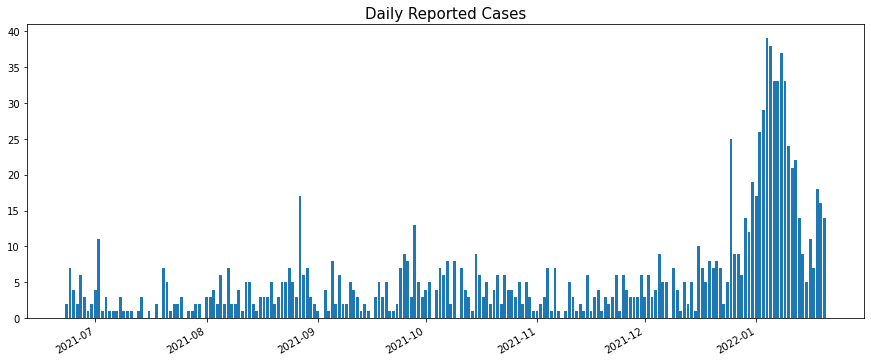

In [6]:
# Task 6. Plot the number of daily reported cases

# ADD YOUR CODE HERE 
freq_stat = cases_df.groupby(cases_df['Report date'].dt.date).count()
freq_stat = freq_stat[-200:]
fig, ax = plt.subplots(1,figsize=(15, 6))
fig.autofmt_xdate()
ax.bar(freq_stat.index, freq_stat['Case no.'])
# Suppress the print string by adding a semi-colon at the end
ax.set_title('Daily Reported Cases', fontsize=15);

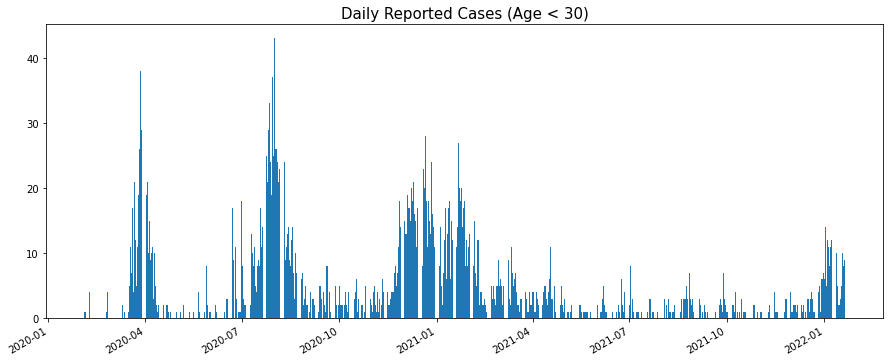

In [7]:
# Task 7. Plot the number of age < 30 cases

#sp_cases = cases_df[cases_df['Gender'] == 'F']
#sp_cases.shape #no of rows = 6799, columns = 10
sp_cases_30 = cases_df[cases_df['Age'] < 30]
#sp_cases_30.shape #no of rows = 1623, columns = 10
#sp_cases_30
freq_stat = sp_cases_30.groupby(sp_cases_30['Report date'].dt.date).count()
freq_stat.shape
#freq_stat = freq_stat[-200:]
fig, ax = plt.subplots(1,figsize=(15, 6))
fig.autofmt_xdate()
ax.bar(freq_stat.index, freq_stat['Case no.'])
# Show the diagram of Daily Reported Cases (Age < 30)
# Suppress the print string by adding a semi-colon at the end
ax.set_title('Daily Reported Cases (Age < 30)', fontsize=15);

Text(0.5, 1.0, 'Daily Reported Cases (Local)')

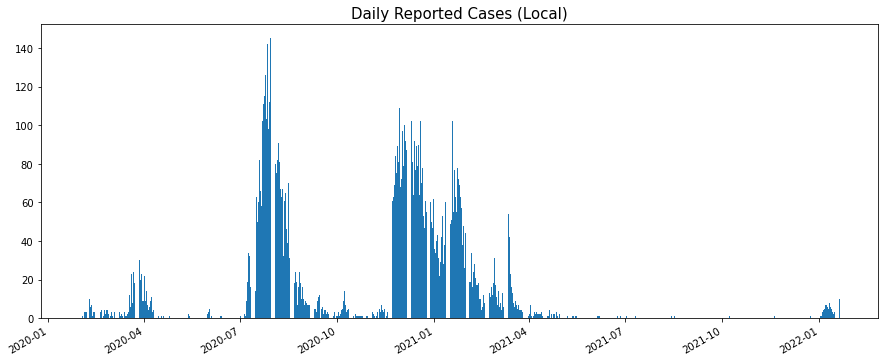

In [8]:
# Task 8. Plot the number of local cases

# ADD YOUR CODE HERE
local_cases = cases_df[(cases_df['Classification*'] == 'Local case') |
(cases_df['Classification*'].str.contains('Local case', case=False)) | (cases_df['Classification*'].str.contains('with imported case', case=False))]
#local_cases.shape
# number of matching rows = 9505, columns = 10
freq_stat = local_cases.groupby(local_cases['Report date'].dt.date).count()
#print(freq_stat[:]['Case no.'])
fig, ax = plt.subplots(1,figsize=(15, 6))
fig.autofmt_xdate()
ax.bar(freq_stat.index, freq_stat['Case no.'])
ax.set_title('Daily Reported Cases (Local)', fontsize=15)

In [9]:
# Task 9. Set a new monthly index

# ADD YOUR CODE HERE
def set_monthly(row):
    return str(row['Report date'])[:7]

cases_df['Monthly'] = cases_df.apply(set_monthly, axis=1)
cases_df
#print(cases_df['Monthly'])

,Case no.,Report date,Date of onset,Gender,Age,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Classification*,Case status*,Asymptomatic,Monthly
0,1,2020-01-23,2020-01-21,M,39.0,Discharged,Non-HK resident,Imported case,Confirmed,N,2020-01
1,2,2020-01-23,2020-01-18,M,56.0,Discharged,HK resident,Imported case,Confirmed,N,2020-01
2,3,2020-01-24,2020-01-20,F,62.0,Discharged,Non-HK resident,Imported case,Confirmed,N,2020-01
3,4,2020-01-24,2020-01-23,F,62.0,Discharged,Non-HK resident,Imported case,Confirmed,N,2020-01
4,5,2020-01-24,2020-01-23,M,63.0,Discharged,Non-HK resident,Imported case,Confirmed,N,2020-01
...,...,...,...,...,...,...,...,...,...,...,...
13096,13097,2022-01-20,NaT,M,11.0,To be provided,HK resident,Epidemiologically linked with imported case,Asymptomatic,Y,2022-01
13097,13098,2022-01-20,2022-01-18,M,14.0,To be provided,HK resident,Epidemiologically linked with imported case,Confirmed,N,2022-01
13098,13099,2022-01-20,2022-01-18,M,16.0,To be provided,HK resident,Epidemiologically linked with imported case,Confirmed,N,2022-01
13099,13100,2022-01-20,2022-01-18,F,1.0,To be provided,HK resident,Epidemiologically linked with local case,Confirmed,N,2022-01


Text(0.5, 1.0, 'Monthly Reported Cases (Local)')

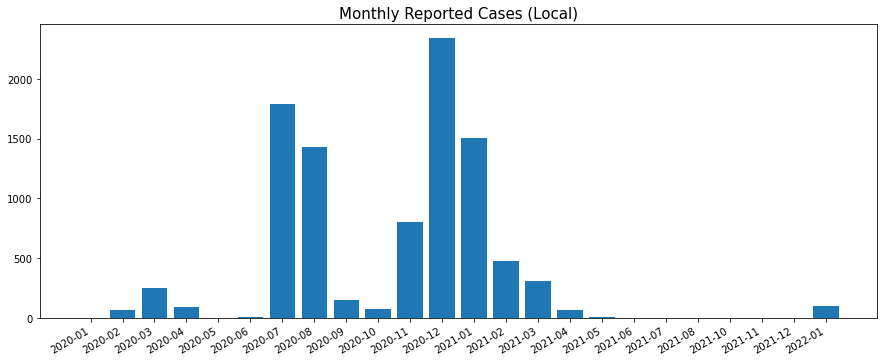

In [10]:
# Task 10. Plot the monthly number of local cases 

# ADD YOUR CODE HERE
local_cases = cases_df[(cases_df['Classification*'] == 'Local case') |
(cases_df['Classification*'].str.contains('Local case', case=False)) | (cases_df['Classification*'].str.contains('with imported case', case=False))]
#local_cases.shape
# number of matching rows = 9505, columns = 10
freq_stat = local_cases.groupby(local_cases['Monthly']).count()
#print(freq_stat[:]['Case no.'])
fig, ax = plt.subplots(1,figsize=(15, 6))
fig.autofmt_xdate()
ax.bar(freq_stat.index, freq_stat['Case no.'])
ax.set_title('Monthly Reported Cases (Local)', fontsize=15)

In [11]:
# Task 11. Run the following code to add a new column 'Diff Days' which contains the difference between 'Report Date' and 'Date of Offset' for non-asymptomatic cases.

# ADD YOUR CODE HERE
def cal_lapse(row):
    if (row['Asymptomatic'] != 'Y'):
        try:
            report_date = pd.to_datetime(row['Report date']).date()
            onset_date = pd.to_datetime(row['Date of onset']).date()
            lapse = report_date - onset_date
            return lapse.days
        except:
            return None
        else:
            return None
cases_df['Lapse Days'] = cases_df.apply(cal_lapse, axis=1)
cases_df[0:81]

,Case no.,Report date,Date of onset,Gender,Age,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Classification*,Case status*,Asymptomatic,Monthly,Lapse Days
0,1,2020-01-23,2020-01-21,M,39.0,Discharged,Non-HK resident,Imported case,Confirmed,N,2020-01,2.0
1,2,2020-01-23,2020-01-18,M,56.0,Discharged,HK resident,Imported case,Confirmed,N,2020-01,5.0
2,3,2020-01-24,2020-01-20,F,62.0,Discharged,Non-HK resident,Imported case,Confirmed,N,2020-01,4.0
3,4,2020-01-24,2020-01-23,F,62.0,Discharged,Non-HK resident,Imported case,Confirmed,N,2020-01,1.0
4,5,2020-01-24,2020-01-23,M,63.0,Discharged,Non-HK resident,Imported case,Confirmed,N,2020-01,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
76,77,2020-02-24,2020-02-19,F,68.0,Discharged,HK resident,Epidemiologically linked with possibly local case,Confirmed,N,2020-02,5.0
77,78,2020-02-24,2020-02-24,F,59.0,Discharged,HK resident,Imported case,Confirmed,N,2020-02,0.0
78,79,2020-02-24,2020-02-04,F,58.0,Discharged,HK resident,Imported case,Confirmed,N,2020-02,20.0
79,80,2020-02-24,NaT,M,57.0,Discharged,HK resident,Imported case,Confirmed,Y,2020-02,NaN


In [12]:
# Task 12. Save the dataframe to CSV file and run Statistics
#cases_df
# ADD YOUR CODE HERE to save the dataframe to CSV file
cases_df.to_csv("ready_cases.csv", index=False)
select_df = cases_df[cases_df['Hospitalised/Discharged/Deceased'] == 'Deceased']
print('Mean Age of Deceased: ', select_df['Age'].mean())
print('Mean Age of Deceased by Gender: ', select_df.groupby(['Gender'])['Age'].mean())

print('Mean Lapse Days: ', cases_df['Lapse Days'].mean())


Mean Age of Deceased:  78.03286384976526
Mean Age of Deceased by Gender:  Gender
F    79.666667
M    76.904762
Name: Age, dtype: float64
Mean Lapse Days:  4.757850662944871


##### Challenging Task
##### This part investigates the relationship between age and number of infection as well as between age and death rate.
##### function age_group is used to classify the age by groups following the method suggested by the HKSAR government . It indicates that people ranging from 30 - 39 are most infected population. However, since the csv file does not contain the total population in each age distribution, people who are easiest to be infected cannot be established.
##### Meanwhile, for the number of deceased people, the age population 80 or above was the greatest even the number of infected people is not high. This results in a very high percentage of death rate compared with other age distribution (around 25% !) .
##### To reduce the overall COVID-19 death rate, the government should set out policy of the elderly and provide appropriate medical supports on time. 

Text(0.5, 1.0, 'Death rate by age distribution (%) ')

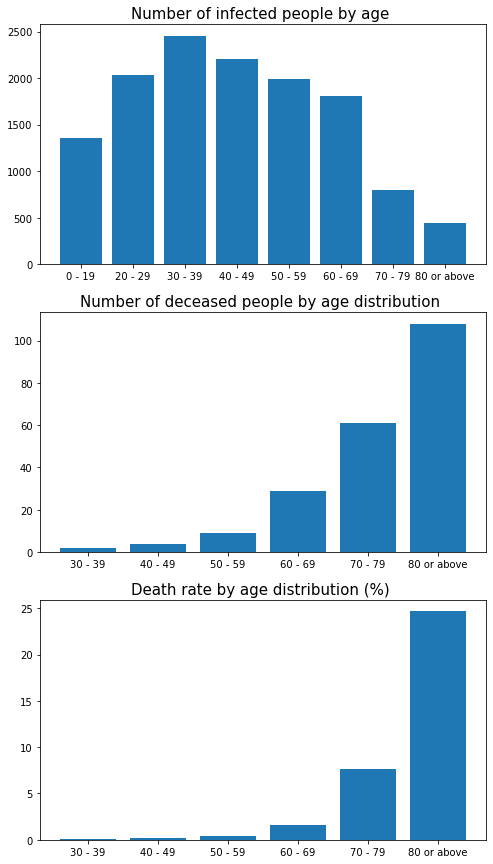

In [13]:
cases_rev = pd.read_csv('ready_cases.csv') 

def age_group(row):
    if row['Age'] >= 0 and row['Age'] < 20:
        return '0 - 19'
    if row['Age'] >= 20 and row['Age'] < 30:
        return '20 - 29'
    if row['Age'] >= 30 and row['Age'] < 40:
        return '30 - 39'
    if row['Age'] >= 40 and row['Age'] < 50:
        return '40 - 49'
    if row['Age'] >= 50 and row['Age'] < 60:
        return '50 - 59'
    if row['Age'] >= 60 and row['Age'] < 70:
        return '60 - 69'
    if row['Age'] >= 70 and row['Age'] < 80:
        return '70 - 79'
    if row['Age'] >= 80:
        return '80 or above'
cases_rev['Age Group'] = cases_rev.apply(age_group, axis=1)
cases_rev

selected_cases = cases_rev
selected_cases2 = cases_rev[cases_rev['Hospitalised/Discharged/Deceased'] == 'Deceased']

freq_stat1 = selected_cases.groupby(selected_cases['Age Group']).count()
fig, ax = plt.subplots(3,figsize=(8, 15))

ax[0].bar(freq_stat1.index, freq_stat1['Case no.'])
ax[0].set_title('Number of infected people by age ', fontsize=15)

freq_stat2 = selected_cases2.groupby(selected_cases2['Age Group']).count()

ax[1].bar(freq_stat2.index, freq_stat2['Case no.'])
ax[1].set_title('Number of deceased people by age distribution ', fontsize=15)

freq_stat3 = 100 * freq_stat2/freq_stat1
freq_stat3
ax[2].bar(freq_stat3.index, freq_stat3['Case no.'])
ax[2].set_title('Death rate by age distribution (%) ', fontsize=15)